In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv("C:/Users/PRATEEK/Downloads/archive/customer_churn_data.csv")


In [3]:
data.shape

(1000, 10)

In [5]:
numeric_columss_data=data.select_dtypes(include=["int64","float64"])

In [6]:
numeric_columss_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [4]:
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [8]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64


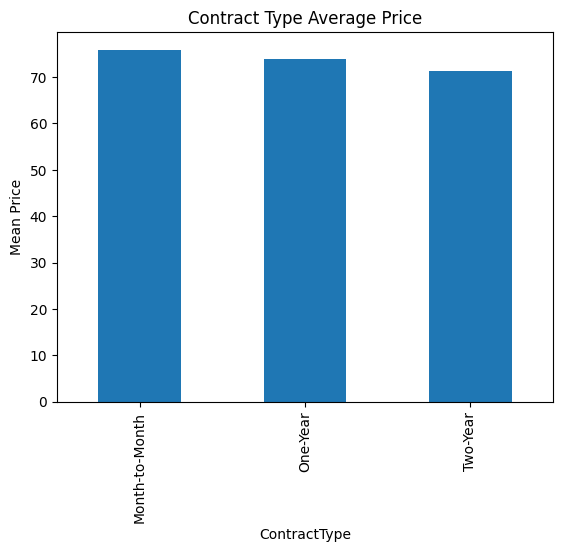

In [9]:
data.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar", ylabel="Mean Price", title="Contract Type Average Price")
plt.show()  


In [10]:
data["InternetService"] = data["InternetService"].fillna("Unknown")


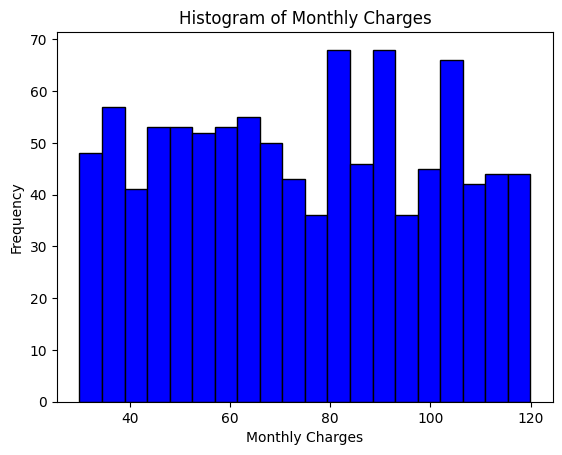

In [11]:
plt.hist(data["MonthlyCharges"], bins=20, color='blue', edgecolor='black')
plt.title("Histogram of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

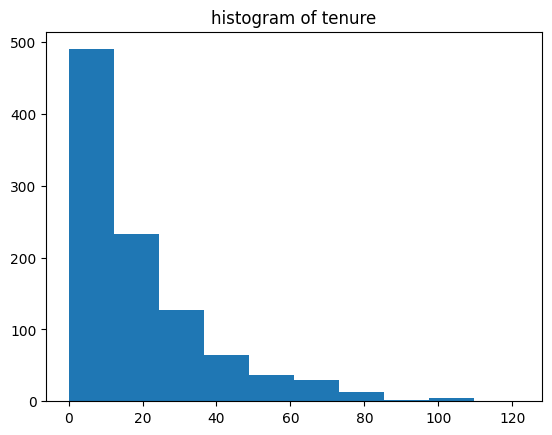

In [12]:
plt.hist(data["Tenure"])
plt.title("histogram of tenure")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ["Gender", "ContractType", "InternetService"]
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  # Store encoders for later use

# Save encoders
import joblib
joblib.dump(encoders, "encoders.pkl")


['encoders.pkl']

In [15]:
X = data[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]  # Use only these
y = data["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances=pd.Series(model.feature_importances_,index=X.columns)
print(feature_importances.sort_values(ascending=False))

# Save the trained model
joblib.dump(model, "model.pkl")


MonthlyCharges    0.386949
Tenure            0.360223
Age               0.214136
Gender            0.038692
dtype: float64


['model.pkl']

In [16]:
data.head(20)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,0,1,353.40,Yes,Yes
1,2,43,1,0,36.67,0,1,0.00,Yes,Yes
2,3,51,0,2,63.79,0,1,127.58,No,Yes
3,4,60,0,8,102.34,1,0,818.72,Yes,Yes
4,5,42,1,32,69.01,0,2,2208.32,No,Yes
5,6,42,0,16,119.75,2,0,1916.00,Yes,Yes
6,7,60,1,14,80.32,1,2,1124.48,No,Yes
7,8,52,0,6,58.90,1,2,353.40,No,Yes
8,9,40,0,53,49.81,2,1,2639.93,Yes,No
9,10,50,0,10,61.55,0,1,615.50,Yes,Yes


In [17]:
model.predict([[35,1,98,49.59]])[0]

C:\Users\PRATEEK\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'No'

In [18]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.87


In [19]:


# Check accuracy on training data
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Check accuracy on test data
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.87


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=3)
print("Mean CV Score:", scores.mean())

Mean CV Score: 0.8679877482272692


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

          No       0.29      0.09      0.13        23
         Yes       0.89      0.97      0.93       177

    accuracy                           0.87       200
   macro avg       0.59      0.53      0.53       200
weighted avg       0.82      0.87      0.84       200

Confusion Matrix:
 [[  2  21]
 [  5 172]]
